<a href="https://colab.research.google.com/github/NikAttano/Tensorflow-MNIST-implementation/blob/main/fashion_MNIST_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Image Processing Using Tensorflow On Fasion MNIST Dataset

Fashion MNIST dataset: The Fashion MNIST dataset is comprised of 70,000 grayscale images of articles of clothing. The greyscale values for a pixel range from 0-255 (black to white). Each low-resolution image is 28x28 pixels and is of exactly one clothing item. Alongside each image is a label that places the article within a category.
Link to dataset : https://github.com/zalandoresearch/fashion-mnist

Paper: Fashion-MNIST: a Novel Image Dataset for Benchmarking Machine Learning Algorithms. Han Xiao, Kashif Rasul, Roland Vollgraf. arXiv:1708.07747

In [1]:
#Installing required packages:
!pip install Numpy
!pip install matplotlib
!pip install Tensorflow

     |████████████████████████████████| 462 kB 13.8 MB/s 


In [2]:
#Importing packages here:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

In [3]:
#Impoting the fashion MNIST dataset from Keras dataset
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


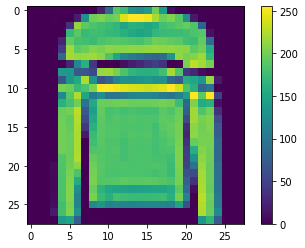

label : 2


In [8]:
#look at a random image from test set and also its corresponding label
plt.figure()
plt.imshow(train_images[5])
plt.colorbar()
plt.show()
print('label : ' + str(train_labels[5]))

In [9]:
#Preprocess the dataset( Basically flatten the images thier values now lie between 0 and 1 by scalar division )
train_images = train_images / 255.0
test_images = test_images / 255.0

In [10]:
#Constructing 3 layer sequential model
model = keras.Sequential([ keras.layers.Flatten(input_shape = (28, 28)),
                           keras.layers.Dense(128, activation = tf.nn.relu),
                           keras.layers.Dense(10, activation = tf.nn.softmax)])

In [13]:
#Compiling the model with adam optimizer and loss function
model.compile( optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [16]:
#Training the model with accuracy as metric
model.fit(train_images, train_labels, epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1723 - accuracy: 0.9353
Epoch 2/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.1707 - accuracy: 0.9363
Epoch 3/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.1658 - accuracy: 0.9381
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1626 - accuracy: 0.9399
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1570 - accuracy: 0.9419


In [19]:
#Calculate test accuracy and loss
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.3870 - accuracy: 0.8905
0.890500009059906


In [22]:
#Looking at predictions
predictions = model.predict(test_images)
predictions[0]

array([3.7382012e-13, 1.3532521e-16, 3.0344932e-15, 9.5787007e-16,
       1.2651466e-14, 8.7160083e-07, 2.3339751e-14, 2.3557455e-03,
       7.5767230e-13, 9.9764341e-01], dtype=float32)

In [24]:
#Determine class label from the predictions
print(np.argmax(predictions[0]))

9


In [25]:
#Compare with original label
print(test_labels[0])

9


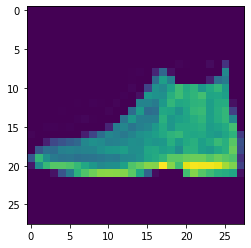

In [27]:
plt.imshow(test_images[0])